### About the Dataset
The marketing_campaign dataset provides detailed insights into customer demographics, purchasing behavior, and marketing campaign engagement. It includes variables such as age, income, marital status, education, product purchases, and responses to various promotional offers. This rich dataset is ideal for customer segmentation, predictive modeling, and campaign effectiveness analysis. By examining these attributes, businesses can tailor marketing strategies, optimize resource allocation, and enhance customer targeting to drive better engagement and sales outcomes.

### Import libraries
1. **pandas** : used for reading and working with tabular data.
2. **matplotlib** : a library used for creating visual plots and charts.
3. **seaborn** : a statistical data visualization library built on top of Matplotlib for prettier plots.
4. **StandardScaler** : to scale (normalize) data so all features have equal importance in clustering.
5. **KMeans** : used for performing customer segmentation.
6. **PCA** : helps reduce data to 2 dimensions for easy visualization.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

### Load the dataset

In [5]:
df = pd.read_csv('marketing_campaign.csv', sep='\t') 

### Check missing values and dealing with them 

In [7]:
print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64


Only the Income column has missing values (24 rows); all other columns are fully complete and ready for analysis.

In [9]:
# Drop rows with missing 'Income' values
df_clean = df.dropna(subset=['Income'])

### Select relevant features for clustering

In [11]:
features = [
    'Income', 'Recency', 'Kidhome', 'Teenhome',
    'MntWines', 'MntFruits', 'MntMeatProducts',
    'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'
]
X = df_clean[features]

The key features from the dataset that are most relevant for customer segmentation. These include:
1. **Demographics** : Income, Recency (how recently they made a purchase), Kidhome, Teenhome (number of children/teenagers at home)
2. **Spending Behavior** : Amount spent on Wines, Fruits, Meat, Fish, Sweets, and Gold products

These features help the K-Means model group customers based on both their financial status and buying patterns, enabling more meaningful and actionable segments.

### Standardize the data
we scale all the selected features (like Income, Spending, Recency, etc.) using StandardScaler, which transforms the data so that each feature has a mean of 0 and a standard deviation of 1.

In [14]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Apply K-Means Clustering
divide the customers into (say) 3 groups based on their behavior and characteristics.

In [16]:
kmeans = KMeans(n_clusters=3, random_state=42)
df_clean['Cluster'] = kmeans.fit_predict(X_scaled)

C:\Users\Nishita Bala\AppData\Local\Temp\ipykernel_9480\872542904.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Cluster'] = kmeans.fit_predict(X_scaled)


### View the number of customers in each cluster
The result is a sorted list showing how many customers belong to each cluster. This helps in analyzing the distribution of customers across different clusters after the clustering algorithm has been applied.

In [18]:
print("\nCustomer count per cluster:")
print(df_clean['Cluster'].value_counts().sort_index())


Customer count per cluster:
Cluster
0    951
1    589
2    676
Name: count, dtype: int64


### Analyze cluster characteristics
It summarizes the average feature values for each cluster, helping you understand the key characteristics and differences between customer groups.

In [24]:
cluster_profile = df_clean.groupby('Cluster')[features].mean()
print("\nCluster Profiles:")
print(cluster_profile)


Cluster Profiles:
               Income    Recency   Kidhome  Teenhome    MntWines  MntFruits  \
Cluster                                                                       
0        33973.873817  49.179811  0.924290  0.385910   51.480547   5.700315   
1        75931.977929  50.078098  0.064516  0.225806  593.246180  71.329372   
2        57317.781065  47.849112  0.091716  0.917160  410.803254  16.229290   

         MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  
Cluster                                                                    
0              28.499474         7.829653          5.555205     16.626709  
1             449.191851       103.804754         74.483871     81.592530  
2             115.955621        21.920118         15.890533     49.640533  


### Visualize clusters using PCA (reduce to 2D)
reduces the dataset to 2 dimensions using PCA, allowing clusters to be visualized in a 2D plot while preserving key data patterns.

In [28]:
pca = PCA(n_components=2)
pca_components = pca.fit_transform(X_scaled)
df_clean['PCA1'] = pca_components[:, 0]
df_clean['PCA2'] = pca_components[:, 1]

C:\Users\Nishita Bala\AppData\Local\Temp\ipykernel_9480\696551742.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['PCA1'] = pca_components[:, 0]
C:\Users\Nishita Bala\AppData\Local\Temp\ipykernel_9480\696551742.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['PCA2'] = pca_components[:, 1]


### Plot PCA result with clusters

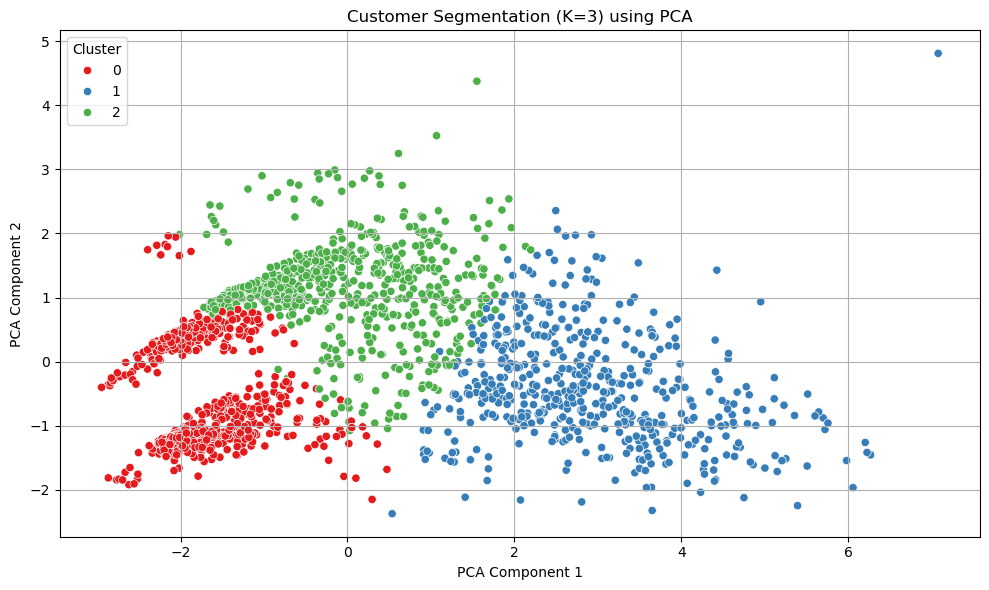

In [30]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_clean, x='PCA1', y='PCA2', hue='Cluster', palette='Set1')
plt.title('Customer Segmentation (K=3) using PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()

### Insights 

1. **Three Distinct Segments:** 
The plot shows three clusters (K=3) — Red (Cluster 0), Green (Cluster 1), and Blue (Cluster 2).
2. **Cluster Distribution:**
    * **Cluster 2 (Blue)** is widely spread and indicates high variance in customer behavior.
    * **Cluster 0 (Red) and Cluster 1 (Green)** are more compact and well-separated.
3. **Segment Characteristics:**
    * **Cluster 0 (Red)**: Likely to represent a specific and tightly grouped customer behavior.
    * **Cluster 1 (Green)**: Transitional group between Cluster 0 and Cluster 2.
    * **Cluster 2 (Blue)**: Diverse group — possibly more complex or varied in preferences.
4. **PCA Effectiveness:**
PCA has reduced dimensions effectively while maintaining visible cluster separability.
5. **Use in Marketing:**
These clusters can guide targeted marketing and personalized customer engagement strategies.

### Conclusion
The K-Means clustering model effectively segmented customers into three distinct groups based on income, recency, and product spending. These insights enable targeted marketing strategies for each segment, improving customer engagement and business performance. Visual analysis further validated meaningful differentiation, supporting data-driven decision-making in customer relationship management.